<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-окружения" data-toc-modified-id="Подготовка-окружения-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Подготовка окружения</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Ответьте-на-вопрос-и-обоснуйте-решение" data-toc-modified-id="Ответьте-на-вопрос-и-обоснуйте-решение-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ответьте на вопрос и обоснуйте решение</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


__Описание данных:__
- Набор данных находится в файле /datasets/insurance.csv.
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

### Подготовка окружения

Загрузим все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Загрузка данных

Загрузим данные и отобразим их и обзорную и статистическую информацию по ним.

In [2]:
data = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов

Оотобразим первые и последние строки данных и обзорную информацию по ним.

In [3]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Отобразим статистическую информацию о данных.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Проверим, есть и в данных дублирующиеся значения.

In [6]:
data = data.drop_duplicates().reset_index(drop=True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,4847.0,0.498453,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,4847.0,31.023932,8.487995,18.0,24.0,30.0,37.0,65.0
Зарплата,4847.0,39895.811842,9972.953985,5300.0,33200.0,40200.0,46600.0,79000.0
Члены семьи,4847.0,1.203425,1.098664,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,4847.0,0.152259,0.468934,0.0,0.0,0.0,0.0,5.0


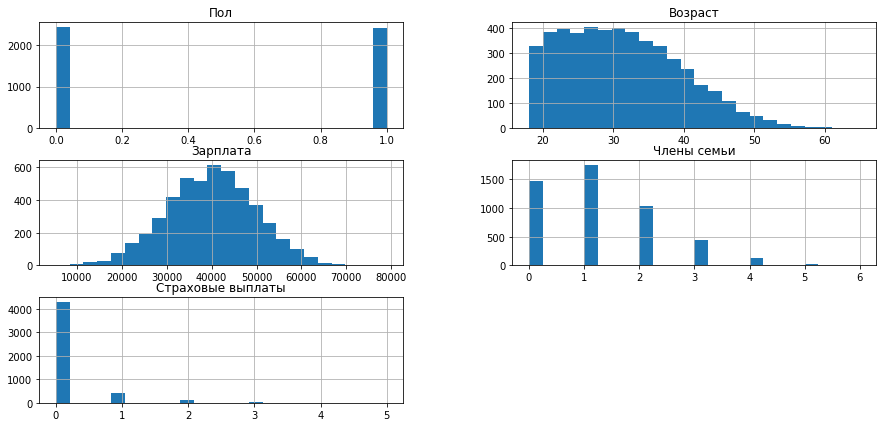

In [8]:
data.hist(figsize=(15, 7), bins=24)
plt.show()

Все данные хранятся в числовом формате и не содержат пропусков. Однако в данных были дубликаты,удаление которых, однако, не слишком повлияло на статистические показатели. В данных значение пола сбалансировано, целевой признак, напротив, слишком тяготеет к нулю.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Ответьте на вопрос и обоснуйте решение

__Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?__

Качество линейной регрессии изменится, однако незначительно, так как признаки будут умножаться как тренировочные, так и тестовые, соответственно модель будет изначально обучаться на искаженных данных.

Проверим это предположение. Сформируем случайную матрицу и обратную к ней для проверки того, что матрица действительно является обратимой.

In [9]:
matrix = np.array([[randint(100,100000) for i in range(4)] for i in range(4)])
inverse_matrix = np.linalg.inv(matrix)
print('Исходная случайная матрица:\n', matrix)
print('\nМатрица, обратная к исходной:\n', inverse_matrix, '\n\nЕдиничная матрица, получившаяся в результате перемножения исходной и обратной матриц:')
inverse_matrix.dot(matrix).round(5)

Исходная случайная матрица:
 [[55216 95513  3364 13254]
 [30243 47099 90285 37778]
 [70938 41509 10051  4337]
 [13544 10474 34289  2613]]

Матрица, обратная к исходной:
 [[-9.52340061e-06  1.38170626e-06  2.27075571e-05 -9.35997802e-06]
 [ 1.77910110e-05 -5.77546304e-06 -1.47833004e-05  1.77950851e-05]
 [-6.88964432e-07 -1.54446547e-06 -5.46887098e-06  3.49012034e-05]
 [-1.29101452e-05  3.62558541e-05  1.33223313e-05 -9.81023888e-05]] 

Единичная матрица, получившаяся в результате перемножения исходной и обратной матриц:


array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0., -0.],
       [-0., -0.,  1., -0.],
       [ 0.,  0.,  0.,  1.]])

Сформируем набор признаков и целевой признак и умножим целевой признак на обратимую матрицу.

In [10]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [11]:
features_multiplied = features.dot(matrix)

Сформируем обучающие и тестовые датасеты для обычного обучения и с признаками, умноженными на матрицу.

In [12]:
(features_train, features_test,
 target_train, target_test) = train_test_split(features,
                                               target,
                                               test_size=.25,
                                               random_state=12345)
(features_multiplied_train,
 features_multiplied_test) = (features_multiplied.loc[features_train.index],
                              features_multiplied.loc[features_test.index])

Обучим модель линейной регрессии на обычных и трансформированных данных.

In [13]:
model = LinearRegression()

In [14]:
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print(r2_score(target_test, predictions))
mean_squared_error(target_test, predictions)

0.42307727492147584


0.11955009374099854

In [15]:
model.fit(features_multiplied, target)
predictions = model.predict(features_multiplied_test)
print(r2_score(target_test, predictions))
mean_squared_error(target_test, predictions)

0.4241846333130991


0.1193206266152142

**Ответ:** Результаты обучения и работы модели изменились, но незначительно, на уровне сотых. Можно считать, что умножение на обратимую матрицу не влияет на результат работы модели.

**Обоснование:** Согласно формулам ниже, умножение матрицы признаков на обратимую марицу не влияет на результат предсказания. За счет того, что обучающая выборка также умножается на эту матрицу, обратная матрица, оставшаяся в формуле обучения сокращается с матрицей из формулы предсказания.

Формула обучения:

$$
w = ((ZX)^T X Z)^{-1} (ZX)^T y =
$$

$$
(X^T X Z Z^T)^{-1} X^T Z^T y =
$$

$$
Z^{-1} (Z^T)^{-1} Z^T (X^T X)^{-1} X^T y = 
$$

$$
Z^{-1} E (X^T X)^{-1} X^T y = 
$$

$$
Z^{-1} (X^T X)^{-1} X^T y
$$

Предсказания:

$$
a = XZw
$$

$$
= X Z Z^{-1} (X^T X)^{-1} X^T y
$$

$$
= X (X^T X)^{-1} X^T y
$$

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = P^{-1}w = P^{-1}(X^T X)^{-1} X^T y
$$
\
$$
w' = P^{-1}((XE)^T XE)^{-1} (XE)^T y = 
$$
$$
= P^{-1}(E^T X^T X E)^{-1} (XE)^T y = 
$$
$$
= P^{-1}((P^{-1})^T P^T X^T X P P^{-1})^{-1} (XPP^{-1})^T y = 
$$
$$
= P^{-1}((P^{-1})^T (XP)^T (XP) P^{-1})^{-1} (XPP^{-1})^T y = 
$$
$$
= P^{-1} P ((XP)^T (XP))^{-1} ((P^{-1})^T)^{-1} (P^{-1})^T (XP)^T y =
$$
$$
= P^{-1} P ((XP)^T(XP))^{-1} ((P^T)^{-1})^{-1} (P^T)^{-1} (XP)^T y =
$$
$$
= P^{-1} P ((XP)^T(XP))^{-1} P^T (P^T)^{-1} (XP)^T y =
$$
$$
= E ((XP)^T(XP))^{-1} E (XP)^T y =
$$
$$
= ((XP)^T(XP))^{-1} (XP)^T y 
$$

\
$$
a = (XP)w'
$$
\
$$
a = X P ((XP)^T(XP))^{-1} (XP)^T y 
$$
$$
= X P (P^T X^T X P)^{-1} P^T X^T y 
$$
$$
= X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$
$$
= X E (X^T X)^{-1} E X^T y 
$$
$$
= X (X^T X)^{-1} X^T y 
$$
$$
= Xw
$$


Таким образом умножение признаковой матрицы на обратимую не приведет к изменению обученной модели.

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
\
$$
w' = P^{-1}w
$$

Что и требовалось доказать

## Алгоритм преобразования

**Алгоритм**

Для шифрования используем 4х4 обратимую матрицу. Из примера выше следует, что такая матрица не должна повлиять на результаты обучения.

Умножим исходную матрицу признаков на обратимую и получим матрицу признаков, по которой невозможно востановить иссходную без информации об обратимой матрице.

## Проверка алгоритма

Для проверки алгоритма сформируем исходную матрицу и проверим ее обратимость.

In [16]:
matrix = np.array([[33273,16260,56015,24605],
                   [13573,70910,65842,47835],
                   [62962,75795,98193,46054],
                   [40131,51545,58242,91791]])
inverse_matrix = np.linalg.inv(matrix)
print('Исходная случайная матрица:\n', matrix)
print('\nМатрица, обратная к исходной:\n', inverse_matrix, '\n\nЕдиничная матрица, получившаяся в результате перемножения исходной и обратной матриц:')
inverse_matrix.dot(matrix).round(5)

Исходная случайная матрица:
 [[33273 16260 56015 24605]
 [13573 70910 65842 47835]
 [62962 75795 98193 46054]
 [40131 51545 58242 91791]]

Матрица, обратная к исходной:
 [[-2.19875132e-05 -3.21141055e-05  2.94049624e-05  7.87620637e-06]
 [-3.51932337e-05  3.08132431e-06  1.90303954e-05 -1.72011920e-06]
 [ 3.91319251e-05  1.77101742e-05 -1.75375000e-05 -1.09197544e-05]
 [ 4.54613788e-06  1.07274506e-06 -1.24146507e-05  1.53454243e-05]] 

Единичная матрица, получившаяся в результате перемножения исходной и обратной матриц:


array([[ 1., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0., -0.,  1.]])

Умножим признаки на полученную матрицу.

In [17]:
features_multiplied =  features.dot(matrix)

Проверим доступность персональной информации из новых данных.

In [18]:
features_multiplied.dot(inverse_matrix).round(2)

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4842,-0.0,28.0,35700.0,2.0
4843,0.0,34.0,52400.0,1.0
4844,-0.0,20.0,33900.0,2.0
4845,1.0,22.0,32700.0,3.0


Сформируем обучающие и тестовые датасеты для обучения с признаками, умноженными на матрицу.

In [19]:
(features_multiplied_train,
 features_multiplied_test) = (features_multiplied.loc[features_train.index],
                              features_multiplied.loc[features_test.index])

Обучим модель линейной регрессии на обычных и трансформированных данных.

In [20]:
model = LinearRegression()

In [21]:
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print(r2_score(target_test, predictions))
mean_squared_error(target_test, predictions)

0.42307727492147584


0.11955009374099854

In [22]:
model.fit(features_multiplied, target)
predictions = model.predict(features_multiplied_test)
print(r2_score(target_test, predictions))
mean_squared_error(target_test, predictions)

0.4241846333125554


0.11932062661532686

__Вывод__: для защиты персональных данных возможно использование матриц. При этом восстановить исходную таблицу не составляет труда, а качество модели отличается незначительно.